In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 96
import numpy as np
import pandas as pd
import seaborn as sns

# import libraries for biological data analysis
from coolpuppy import coolpup
from coolpuppy.lib import numutils
from coolpuppy.lib.puputils import divide_pups
from coolpuppy import plotpup
import cooler
import bioframe
import cooltools
from cooltools import expected_cis, expected_trans
from cooltools.lib import plotting
from chromoscores.snipping import *


import warnings
warnings.filterwarnings('ignore')


### ctcf peaks

In [2]:
ctcf = bioframe.read_table('/project/fudenber_735/yxiao977/frip_sm_data/ChIP_fastqs_maps/Justice_2020_mm10/SRR10099910/SRR10099910.q30.mm10.sort_peaks.narrowPeak', schema='bed')
ctcf['mid']=(ctcf.end+ctcf.start)/2

In [3]:
ctcf

,chrom,start,end,name,score,strand,mid
0,chr1,4142587,4142853,SRR10099910.q30.mm10.sort_peak_1,333,.,4142720.0
1,chr1,4228248,4228459,SRR10099910.q30.mm10.sort_peak_2,185,.,4228353.5
2,chr1,4297196,4297351,SRR10099910.q30.mm10.sort_peak_3,55,.,4297273.5
3,chr1,4332532,4332829,SRR10099910.q30.mm10.sort_peak_4,371,.,4332680.5
4,chr1,4346252,4346530,SRR10099910.q30.mm10.sort_peak_5,312,.,4346391.0
...,...,...,...,...,...,...,...
50079,chrY,90805066,90805341,SRR10099910.q30.mm10.sort_peak_50080,610,.,90805203.5
50080,chrY,90807693,90807937,SRR10099910.q30.mm10.sort_peak_50081,538,.,90807815.0
50081,chrY,90808769,90808990,SRR10099910.q30.mm10.sort_peak_50082,465,.,90808879.5
50082,chrY,90810878,90811138,SRR10099910.q30.mm10.sort_peak_50083,377,.,90811008.0


In [4]:
ctcf['quartile_score']=pd.qcut(ctcf['score'],4, labels=False) + 1

In [5]:
ctcf_quart=ctcf[ctcf['quartile_score']==4]

In [6]:
ctcf_quart

,chrom,start,end,name,score,strand,mid,quartile_score
6,chr1,4416739,4417093,SRR10099910.q30.mm10.sort_peak_7,679,.,4416916.0,4
8,chr1,4516624,4516971,SRR10099910.q30.mm10.sort_peak_9,622,.,4516797.5,4
10,chr1,4768407,4768690,SRR10099910.q30.mm10.sort_peak_11,933,.,4768548.5,4
11,chr1,4769908,4770239,SRR10099910.q30.mm10.sort_peak_12,769,.,4770073.5,4
25,chr1,6135128,6135408,SRR10099910.q30.mm10.sort_peak_26,592,.,6135268.0,4
...,...,...,...,...,...,...,...,...
50068,chrY,90720510,90720813,SRR10099910.q30.mm10.sort_peak_50069,676,.,90720661.5,4
50076,chrY,90799262,90799555,SRR10099910.q30.mm10.sort_peak_50077,1103,.,90799408.5,4
50077,chrY,90800667,90800911,SRR10099910.q30.mm10.sort_peak_50078,785,.,90800789.0,4
50078,chrY,90803514,90803791,SRR10099910.q30.mm10.sort_peak_50079,921,.,90803652.5,4


### ctcf from JASPAR data

In [7]:
direct='/project/fudenber_735/motifs/mm10/jaspar/MA0139.1.tsv.gz'

In [8]:
ctcfs_motif=bioframe.read_table(direct)

In [9]:
ctcfs_motif.head()

,0,1,2,3,4,5,6
0,chr10,3103662,3103681,CTCF,814,410,-
1,chr10,3108121,3108140,CTCF,859,504,-
2,chr10,3119020,3119039,CTCF,801,386,-
3,chr10,3124081,3124100,CTCF,807,397,-
4,chr10,3127081,3127100,CTCF,810,403,+


In [10]:
ctcf_motif=ctcfs_motif.rename(columns={0: 'chrom', 1: 'start',2:'end',3:'name',4:'score',5:'pval',6:'strand'})
ctcf_motif

,chrom,start,end,name,score,pval,strand
0,chr10,3103662,3103681,CTCF,814,410,-
1,chr10,3108121,3108140,CTCF,859,504,-
2,chr10,3119020,3119039,CTCF,801,386,-
3,chr10,3124081,3124100,CTCF,807,397,-
4,chr10,3127081,3127100,CTCF,810,403,+
...,...,...,...,...,...,...,...
825505,chrY,90829177,90829196,CTCF,842,465,+
825506,chrY,90839573,90839592,CTCF,804,392,+
825507,chrY,90839785,90839804,CTCF,885,565,-
825508,chrY,90839787,90839806,CTCF,842,465,+


In [11]:
ctcf_motif['quartile_score']=pd.qcut(ctcf_motif['score'],4,labels=False) + 1
ctcf_motif

,chrom,start,end,name,score,pval,strand,quartile_score
0,chr10,3103662,3103681,CTCF,814,410,-,2
1,chr10,3108121,3108140,CTCF,859,504,-,4
2,chr10,3119020,3119039,CTCF,801,386,-,1
3,chr10,3124081,3124100,CTCF,807,397,-,1
4,chr10,3127081,3127100,CTCF,810,403,+,2
...,...,...,...,...,...,...,...,...
825505,chrY,90829177,90829196,CTCF,842,465,+,4
825506,chrY,90839573,90839592,CTCF,804,392,+,1
825507,chrY,90839785,90839804,CTCF,885,565,-,4
825508,chrY,90839787,90839806,CTCF,842,465,+,4


In [12]:
ctcf_motif_quart=ctcf_motif[ctcf_motif['quartile_score']==4]
ctcf_motif_quart

,chrom,start,end,name,score,pval,strand,quartile_score
1,chr10,3108121,3108140,CTCF,859,504,-,4
6,chr10,3136802,3136821,CTCF,876,543,+,4
19,chr10,3202574,3202593,CTCF,844,470,-,4
24,chr10,3218832,3218851,CTCF,842,465,+,4
27,chr10,3229366,3229385,CTCF,869,527,+,4
...,...,...,...,...,...,...,...,...
825503,chrY,90828914,90828933,CTCF,861,506,+,4
825504,chrY,90829175,90829194,CTCF,885,565,-,4
825505,chrY,90829177,90829196,CTCF,842,465,+,4
825507,chrY,90839785,90839804,CTCF,885,565,-,4


### overlap

In [13]:
peaks_motifs = bioframe.overlap(ctcf,ctcf_motif,how='inner')

In [14]:
peaks_motifs = peaks_motifs[(peaks_motifs['chrom']!= 'chrX')&(peaks_motifs['chrom']!= 'chrY')]
peaks_motifs

,chrom,start,end,name,score,strand,mid,quartile_score,chrom_,start_,end_,name_,score_,pval_,strand_,quartile_score_
0,chr19,3204556,3204807,SRR10099910.q30.mm10.sort_peak_22523,399,.,3204681.5,3,chr19,3204670,3204689,CTCF,889,576,-,4
1,chr19,3208342,3208627,SRR10099910.q30.mm10.sort_peak_22524,509,.,3208484.5,3,chr19,3208468,3208487,CTCF,892,582,+,4
2,chr19,3292050,3292348,SRR10099910.q30.mm10.sort_peak_22525,615,.,3292199.0,4,chr19,3292185,3292204,CTCF,872,534,+,4
3,chr19,3316508,3316683,SRR10099910.q30.mm10.sort_peak_22526,75,.,3316595.5,1,chr19,3316577,3316596,CTCF,858,500,+,4
4,chr19,3320895,3321170,SRR10099910.q30.mm10.sort_peak_22527,431,.,3321032.5,3,chr19,3321011,3321030,CTCF,918,657,+,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,chr6,113000931,113001280,SRR10099910.q30.mm10.sort_peak_38872,865,.,113001105.5,4,chr6,113000914,113000933,CTCF,813,408,-,2
52580,chr6,120469314,120469534,SRR10099910.q30.mm10.sort_peak_39113,59,.,120469424.0,1,chr6,120469311,120469330,CTCF,845,473,+,4
52581,chr6,133188318,133188484,SRR10099910.q30.mm10.sort_peak_39447,46,.,133188401.0,1,chr6,133188316,133188335,CTCF,800,384,+,1
52582,chr6,140924571,140924953,SRR10099910.q30.mm10.sort_peak_39633,573,.,140924762.0,3,chr6,140924559,140924578,CTCF,830,442,+,3


In [15]:
peaks_motifs=peaks_motifs.rename(columns={'strand':'strand_','strand_':'strand'})

In [16]:
peaks_motifs=peaks_motifs[['chrom','start','end','name','score','mid','quartile_score','strand']]
peaks_motifs

,chrom,start,end,name,score,mid,quartile_score,strand
0,chr19,3204556,3204807,SRR10099910.q30.mm10.sort_peak_22523,399,3204681.5,3,-
1,chr19,3208342,3208627,SRR10099910.q30.mm10.sort_peak_22524,509,3208484.5,3,+
2,chr19,3292050,3292348,SRR10099910.q30.mm10.sort_peak_22525,615,3292199.0,4,+
3,chr19,3316508,3316683,SRR10099910.q30.mm10.sort_peak_22526,75,3316595.5,1,+
4,chr19,3320895,3321170,SRR10099910.q30.mm10.sort_peak_22527,431,3321032.5,3,+
...,...,...,...,...,...,...,...,...
52579,chr6,113000931,113001280,SRR10099910.q30.mm10.sort_peak_38872,865,113001105.5,4,-
52580,chr6,120469314,120469534,SRR10099910.q30.mm10.sort_peak_39113,59,120469424.0,1,+
52581,chr6,133188318,133188484,SRR10099910.q30.mm10.sort_peak_39447,46,133188401.0,1,+
52582,chr6,140924571,140924953,SRR10099910.q30.mm10.sort_peak_39633,573,140924762.0,3,+


### orientational overlap

In [17]:
peaks_motifs_right=peaks_motifs[peaks_motifs['strand']=='+']
peaks_motifs_left=peaks_motifs[peaks_motifs['strand']=='-']
peaks_motifs_dir_overlap=bioframe.overlap(peaks_motifs_right,peaks_motifs_left,how='inner')
peaks_motifs_dir_overlap

,chrom,start,end,name,score,mid,quartile_score,strand,chrom_,start_,end_,name_,score_,mid_,quartile_score_,strand_
0,chr19,3548409,3548575,SRR10099910.q30.mm10.sort_peak_22545,98,3548492.0,1,+,chr19,3548409,3548575,SRR10099910.q30.mm10.sort_peak_22545,98,3548492.0,1,-
1,chr19,3623766,3624269,SRR10099910.q30.mm10.sort_peak_22551,593,3624017.5,4,+,chr19,3623766,3624269,SRR10099910.q30.mm10.sort_peak_22551,593,3624017.5,4,-
2,chr19,3623766,3624269,SRR10099910.q30.mm10.sort_peak_22551,593,3624017.5,4,+,chr19,3623766,3624269,SRR10099910.q30.mm10.sort_peak_22551,593,3624017.5,4,-
3,chr19,3912198,3912523,SRR10099910.q30.mm10.sort_peak_22570,325,3912360.5,3,+,chr19,3912198,3912523,SRR10099910.q30.mm10.sort_peak_22570,325,3912360.5,3,-
4,chr19,4099070,4099377,SRR10099910.q30.mm10.sort_peak_22585,939,4099223.5,4,+,chr19,4099070,4099377,SRR10099910.q30.mm10.sort_peak_22585,939,4099223.5,4,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,chr6,147113337,147113483,SRR10099910.q30.mm10.sort_peak_39773,57,147113410.0,1,+,chr6,147113337,147113483,SRR10099910.q30.mm10.sort_peak_39773,57,147113410.0,1,-
5288,chr6,148916892,148917175,SRR10099910.q30.mm10.sort_peak_39804,304,148917033.5,3,+,chr6,148916892,148917175,SRR10099910.q30.mm10.sort_peak_39804,304,148917033.5,3,-
5289,chr6,149057904,149058155,SRR10099910.q30.mm10.sort_peak_39813,291,149058029.5,3,+,chr6,149057904,149058155,SRR10099910.q30.mm10.sort_peak_39813,291,149058029.5,3,-
5290,chr6,149095486,149095748,SRR10099910.q30.mm10.sort_peak_39814,182,149095617.0,2,+,chr6,149095486,149095748,SRR10099910.q30.mm10.sort_peak_39814,182,149095617.0,2,-


In [18]:
print(len(peaks_motifs_dir_overlap.index)/len(peaks_motifs.index),len(peaks_motifs_right.index)/len(peaks_motifs.index),len(peaks_motifs_left)/len(peaks_motifs.index))

0.10069642653270922 0.5005518133729117 0.49944818662708834


### overlap, quartile

In [19]:
peak_motif_quartile= bioframe.overlap(ctcf_quart,ctcf_motif_quart,how='inner')
peak_motif_quartile

,chrom,start,end,name,score,strand,mid,quartile_score,chrom_,start_,end_,name_,score_,pval_,strand_,quartile_score_
0,chr19,3292050,3292348,SRR10099910.q30.mm10.sort_peak_22525,615,.,3292199.0,4,chr19,3292185,3292204,CTCF,872,534,+,4
1,chr19,3451207,3451572,SRR10099910.q30.mm10.sort_peak_22541,748,.,3451389.5,4,chr19,3451397,3451416,CTCF,891,580,-,4
2,chr19,3586586,3586909,SRR10099910.q30.mm10.sort_peak_22547,629,.,3586747.5,4,chr19,3586722,3586741,CTCF,968,851,+,4
3,chr19,3587798,3588061,SRR10099910.q30.mm10.sort_peak_22548,713,.,3587929.5,4,chr19,3587905,3587924,CTCF,858,501,-,4
4,chr19,3623766,3624269,SRR10099910.q30.mm10.sort_peak_22551,593,.,3624017.5,4,chr19,3624156,3624175,CTCF,930,695,+,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12528,chrX,162871776,162872110,SRR10099910.q30.mm10.sort_peak_49994,738,.,162871943.0,4,chrX,162871962,162871981,CTCF,938,721,-,4
12529,chrX,166351829,166352131,SRR10099910.q30.mm10.sort_peak_50026,589,.,166351980.0,4,chrX,166351985,166352004,CTCF,913,643,-,4
12530,chrX,166652475,166652782,SRR10099910.q30.mm10.sort_peak_50030,678,.,166652628.5,4,chrX,166652611,166652630,CTCF,867,521,-,4
12531,chrX,169979147,169979491,SRR10099910.q30.mm10.sort_peak_50059,667,.,169979319.0,4,chrX,169979289,169979308,CTCF,885,565,-,4


In [20]:
peaks_motif_quartile=peak_motif_quartile.rename(columns={'strand':'strand_','strand_':'strand'})
peaks_motif_quartile

,chrom,start,end,name,score,strand_,mid,quartile_score,chrom_,start_,end_,name_,score_,pval_,strand,quartile_score_
0,chr19,3292050,3292348,SRR10099910.q30.mm10.sort_peak_22525,615,.,3292199.0,4,chr19,3292185,3292204,CTCF,872,534,+,4
1,chr19,3451207,3451572,SRR10099910.q30.mm10.sort_peak_22541,748,.,3451389.5,4,chr19,3451397,3451416,CTCF,891,580,-,4
2,chr19,3586586,3586909,SRR10099910.q30.mm10.sort_peak_22547,629,.,3586747.5,4,chr19,3586722,3586741,CTCF,968,851,+,4
3,chr19,3587798,3588061,SRR10099910.q30.mm10.sort_peak_22548,713,.,3587929.5,4,chr19,3587905,3587924,CTCF,858,501,-,4
4,chr19,3623766,3624269,SRR10099910.q30.mm10.sort_peak_22551,593,.,3624017.5,4,chr19,3624156,3624175,CTCF,930,695,+,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12528,chrX,162871776,162872110,SRR10099910.q30.mm10.sort_peak_49994,738,.,162871943.0,4,chrX,162871962,162871981,CTCF,938,721,-,4
12529,chrX,166351829,166352131,SRR10099910.q30.mm10.sort_peak_50026,589,.,166351980.0,4,chrX,166351985,166352004,CTCF,913,643,-,4
12530,chrX,166652475,166652782,SRR10099910.q30.mm10.sort_peak_50030,678,.,166652628.5,4,chrX,166652611,166652630,CTCF,867,521,-,4
12531,chrX,169979147,169979491,SRR10099910.q30.mm10.sort_peak_50059,667,.,169979319.0,4,chrX,169979289,169979308,CTCF,885,565,-,4


In [21]:
peaks_motif_quartile=peaks_motif_quartile[['chrom','start','end','name','score','mid','quartile_score','strand','score_','pval_']]

In [22]:
peaks_motif_quartile_right=peaks_motif_quartile[peaks_motif_quartile['strand']=='+']
peaks_motif_quartile_left=peaks_motif_quartile[peaks_motif_quartile['strand']=='-']

In [23]:
peaks_motif_quartile_dir_overlap=bioframe.overlap(peaks_motif_quartile_right,peaks_motif_quartile_left,how='inner')

In [24]:
print(len(peaks_motif_quartile_dir_overlap.index)/len(peaks_motif_quartile.index),len(peaks_motif_quartile_right.index)/len(peaks_motif_quartile.index),len(peaks_motif_quartile_left)/len(peak_motif_quartile.index))

0.04093193967924679 0.49780579270725284 0.5021942072927471


In [25]:
peaks_motif_quartile_dir_n_overlap=bioframe.subtract(peaks_motif_quartile,peaks_motif_quartile_dir_overlap)
peaks_motif_quartile_dir_n_overlap

,chrom,start,end,name,score,mid,quartile_score,strand,score_,pval_
0,chr19,3292050,3292348,SRR10099910.q30.mm10.sort_peak_22525,615,3292199.0,4,+,872,534
1,chr19,3451207,3451572,SRR10099910.q30.mm10.sort_peak_22541,748,3451389.5,4,-,891,580
2,chr19,3586586,3586909,SRR10099910.q30.mm10.sort_peak_22547,629,3586747.5,4,+,968,851
3,chr19,3587798,3588061,SRR10099910.q30.mm10.sort_peak_22548,713,3587929.5,4,-,858,501
4,chr19,3623766,3624269,SRR10099910.q30.mm10.sort_peak_22551,593,3624017.5,4,+,930,695
...,...,...,...,...,...,...,...,...,...,...
11562,chrX,161399134,161399452,SRR10099910.q30.mm10.sort_peak_49972,761,161399293.0,4,+,885,565
11563,chrX,161399134,161399452,SRR10099910.q30.mm10.sort_peak_49972,761,161399293.0,4,+,915,648
11564,chrX,162871776,162872110,SRR10099910.q30.mm10.sort_peak_49994,738,162871943.0,4,-,938,721
11565,chrX,166351829,166352131,SRR10099910.q30.mm10.sort_peak_50026,589,166351980.0,4,-,913,643


In [26]:
print(len(peaks_motif_quartile_dir_n_overlap.index)/len(peaks_motif_quartile.index))

0.9229234820075002


In [27]:
alls=peaks_motif_quartile_dir_n_overlap

In [28]:
rs=alls[alls['strand']=='+']
ls=alls[alls['strand']=='-']    

In [29]:
over=bioframe.overlap(rs,ls,how='inner')

In [30]:
over

,chrom,start,end,name,score,mid,quartile_score,strand,score_,pval_,chrom_,start_,end_,name_,score_,mid_,quartile_score_,strand_,score__,pval__


### picking chromosomes 

In [31]:
peaks_motif_quartile = peaks_motif_quartile[(peaks_motif_quartile['chrom']!= 'chrX')&(peaks_motif_quartile['chrom']!= 'chrY')]
peaks_motif_quartile

,chrom,start,end,name,score,mid,quartile_score,strand,score_,pval_
0,chr19,3292050,3292348,SRR10099910.q30.mm10.sort_peak_22525,615,3292199.0,4,+,872,534
1,chr19,3451207,3451572,SRR10099910.q30.mm10.sort_peak_22541,748,3451389.5,4,-,891,580
2,chr19,3586586,3586909,SRR10099910.q30.mm10.sort_peak_22547,629,3586747.5,4,+,968,851
3,chr19,3587798,3588061,SRR10099910.q30.mm10.sort_peak_22548,713,3587929.5,4,-,858,501
4,chr19,3623766,3624269,SRR10099910.q30.mm10.sort_peak_22551,593,3624017.5,4,+,930,695
...,...,...,...,...,...,...,...,...,...,...
12455,chr6,147240295,147240567,SRR10099910.q30.mm10.sort_peak_39775,732,147240431.0,4,-,957,797
12456,chr6,148354350,148354717,SRR10099910.q30.mm10.sort_peak_39792,667,148354533.5,4,+,900,604
12457,chr6,148705692,148706080,SRR10099910.q30.mm10.sort_peak_39799,955,148705886.0,4,+,926,682
12458,chr6,149119930,149120238,SRR10099910.q30.mm10.sort_peak_39815,734,149120084.0,4,-,858,501


In [32]:
np.unique(peaks_motif_quartile['chrom'])

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr3', 'chr4', 'chr5',
       'chr6', 'chr7', 'chr8', 'chr9'], dtype=object)

In [33]:
peaks_motifs = peaks_motifs[(peaks_motifs['chrom']!= 'chrX')&(peaks_motifs['chrom']!= 'chrY')]
peaks_motifs

,chrom,start,end,name,score,mid,quartile_score,strand
0,chr19,3204556,3204807,SRR10099910.q30.mm10.sort_peak_22523,399,3204681.5,3,-
1,chr19,3208342,3208627,SRR10099910.q30.mm10.sort_peak_22524,509,3208484.5,3,+
2,chr19,3292050,3292348,SRR10099910.q30.mm10.sort_peak_22525,615,3292199.0,4,+
3,chr19,3316508,3316683,SRR10099910.q30.mm10.sort_peak_22526,75,3316595.5,1,+
4,chr19,3320895,3321170,SRR10099910.q30.mm10.sort_peak_22527,431,3321032.5,3,+
...,...,...,...,...,...,...,...,...
52579,chr6,113000931,113001280,SRR10099910.q30.mm10.sort_peak_38872,865,113001105.5,4,-
52580,chr6,120469314,120469534,SRR10099910.q30.mm10.sort_peak_39113,59,120469424.0,1,+
52581,chr6,133188318,133188484,SRR10099910.q30.mm10.sort_peak_39447,46,133188401.0,1,+
52582,chr6,140924571,140924953,SRR10099910.q30.mm10.sort_peak_39633,573,140924762.0,3,+


In [34]:
peaks_motifs_cluster = bioframe.cluster(peaks_motifs, min_dist=10000)#
peaks_motifs_cluster

,chrom,start,end,name,score,mid,quartile_score,strand,cluster,cluster_start,cluster_end
0,chr19,3204556,3204807,SRR10099910.q30.mm10.sort_peak_22523,399,3204681.5,3,-,14054,3204556,3208627
1,chr19,3208342,3208627,SRR10099910.q30.mm10.sort_peak_22524,509,3208484.5,3,+,14054,3204556,3208627
2,chr19,3292050,3292348,SRR10099910.q30.mm10.sort_peak_22525,615,3292199.0,4,+,14055,3292050,3292348
3,chr19,3316508,3316683,SRR10099910.q30.mm10.sort_peak_22526,75,3316595.5,1,+,14056,3316508,3321170
4,chr19,3320895,3321170,SRR10099910.q30.mm10.sort_peak_22527,431,3321032.5,3,+,14056,3316508,3321170
...,...,...,...,...,...,...,...,...,...,...,...
52549,chr6,113000931,113001280,SRR10099910.q30.mm10.sort_peak_38872,865,113001105.5,4,-,24068,112987020,113001280
52550,chr6,120469314,120469534,SRR10099910.q30.mm10.sort_peak_39113,59,120469424.0,1,+,24214,120469314,120469534
52551,chr6,133188318,133188484,SRR10099910.q30.mm10.sort_peak_39447,46,133188401.0,1,+,24403,133188318,133188484
52552,chr6,140924571,140924953,SRR10099910.q30.mm10.sort_peak_39633,573,140924762.0,3,+,24531,140915823,140924953


In [35]:
# Group by 'chuster_start' and 'cluster_end' and get the index of rows with the max 'score' within each group
idx = peaks_motifs_cluster.groupby(['cluster_start', 'cluster_end'])['score'].idxmax()

# Filter the dataframe to keep only the rows with the max 'score' in each group
peaks_motifs_bin_s = peaks_motifs_cluster.loc[idx].reset_index(drop=True)

peaks_motifs_bin_s

,chrom,start,end,name,score,mid,quartile_score,strand,cluster,cluster_start,cluster_end
0,chrM,50,1684,SRR10099910.q30.mm10.sort_peak_48675,146,867.0,2,-,29985,50,1684
1,chr18,3005726,3005978,SRR10099910.q30.mm10.sort_peak_21060,515,3005852.0,3,-,13137,3005726,3005978
2,chr18,3039488,3039650,SRR10099910.q30.mm10.sort_peak_21061,65,3039569.0,1,-,13138,3039488,3039650
3,chr14,3050178,3050329,SRR10099910.q30.mm10.sort_peak_13317,95,3050253.5,1,-,8283,3050178,3050329
4,chr4,3052367,3052649,SRR10099910.q30.mm10.sort_peak_30167,210,3052508.0,2,+,18804,3052367,3052649
...,...,...,...,...,...,...,...,...,...,...,...
29981,chr1,194879563,194879893,SRR10099910.q30.mm10.sort_peak_3195,894,194879728.0,4,+,2082,194879563,194879893
29982,chr1,194962248,194962539,SRR10099910.q30.mm10.sort_peak_3198,478,194962393.5,3,-,2083,194952981,194962539
29983,chr1,194976166,194976743,SRR10099910.q30.mm10.sort_peak_3199,596,194976454.5,4,+,2084,194976166,194976743
29984,chr1,195040477,195040747,SRR10099910.q30.mm10.sort_peak_3200,553,195040612.0,3,+,2085,195040477,195040747


### importing experimental data 

In [36]:
# high-resolution reprocessed publically-available data from Bonev et al. 2017
res = 10_000
bonev_file = '/project/fudenber_735/GEO/bonev_2017_GSE96107/distiller-0.3.1_mm10/results/coolers/HiC_ES.mm10.mapq_30.1000.mcool'
bonev_cooler = cooler.Cooler(bonev_file+'::resolutions/'+str(res))
view_df_bonev = cooltools.lib.make_cooler_view(bonev_cooler)[:19]

In [37]:
# data from Liu& deWit et al. 
prefix_dir_liu = '/project/fudenber_735/GEO/liu_deWit_GSE181848/'
cooler_prefix_liu = prefix_dir_liu
sample_dict_liu ={
    'Wapl-0h':'GSM5512837_HiC.01_WAPL_0h.mcool',
    'Wapl-6h':'GSM5512838_HiC.02_WAPL_6h.mcool'
}
sample='Wapl-6h'
mcool_path_liu =  cooler_prefix_liu + sample_dict_liu[sample]
liu_cooler = cooler.Cooler(mcool_path_liu+'::resolutions/'+str(res))
view_df_liu = cooltools.lib.make_cooler_view(liu_cooler)[:19]

In [38]:
# data from Liu 2021
prefix_dir_liu_new = '/project/fudenber_735/GEO/liu_deWit_2021_GSE135180/distiller-mm10/results/coolers_library/'
cooler_prefix_liu_new = prefix_dir_liu_new
sample_dict_liu_new ={
    'Wapl-0h_new':'liu_wapl0h.mm10.mapq_30.1000.mcool',
    'Wapl-24h_new':'liu_wapl24h.mm10.mapq_30.1000.mcool'
}
sample='Wapl-24h_new'
mcool_path_liu_new =  cooler_prefix_liu_new + sample_dict_liu_new[sample]
liu_new_cooler = cooler.Cooler(mcool_path_liu_new+'::resolutions/'+str(res))
view_df_liu_new = cooltools.lib.make_cooler_view(liu_new_cooler)[:19]

### On-diagonal pile up

INFO:coolpuppy:('chr1', 'chr1'): 743
INFO:coolpuppy:Total number of piled up windows: 743


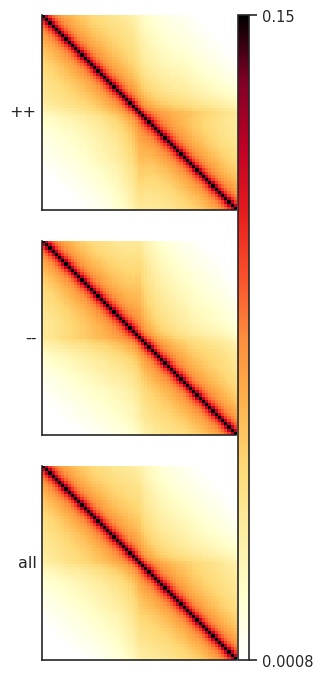

In [39]:
peaks_motifs_quartile=peaks_motif_quartile[['chrom','start','end','score','strand']]
sites=peaks_motifs_quartile.copy()
pup = coolpup.pileup(bonev_cooler, sites, features_format='bed', view_df=view_df_bonev[:1], local=True,
                        by_strand=True,
                        flank=300_000, min_diag=0)
fg = plotpup.plot(pup,
             rows='orientation', row_order=['++', '--','all'],
             score=False, cmap='fall', scale='log', sym=False, vmax=0.15,vmin=0.0008,
             height=3)
plt.show()

### isolation score, observed over expected


In [40]:
import chromoscores.maputils as chrmap
import chromoscores.snipping as chrsnip
import chromoscores.scorefunctions as chrscores
import seaborn as sns

In [41]:
# Bonev et al 2017

INFO:coolpuppy:('chr1', 'chr1'): 743
INFO:coolpuppy:Total number of piled up windows: 743


i is 0
score is 1.2775383111068588
i is 1
score is 1.3025197834200972
i is 2
score is 1.2898058162025574


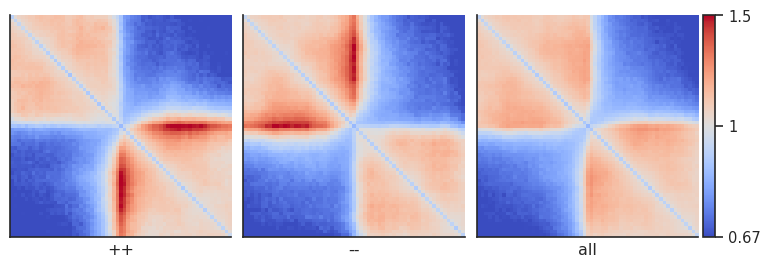

In [55]:
sites=peaks_motifs_quartile.copy()
clr = bonev_cooler
pseudocount = 10./clr.info['sum']
pseudocount = 0
expected = expected_cis(
    clr,
    ignore_diags=0,
    view_df=view_df_bonev[:1],
    chunksize=1000000)

pup = coolpup.pileup(clr, sites, features_format='bed', expected_df=expected,view_df=view_df_bonev[:1], local=True,
                    by_strand=True,
                    flank=300_000, min_diag=0
                    )
scr=[]
delta_val = 1
diag_offset_val = 5
max_distance_val = 30
for i in range(len(pup['data'])):
    print('i is %s'%i)
    pile = pup['data'][i]
    score=chrscores.isolation_score(pile,delta=delta_val,diag_offset=diag_offset_val,max_dist=max_distance_val,
                                    snippet_shapes='triangle',
                                    pseudo_count=pseudocount)
    scr.append(score)
    print('score is %s'%score)
    

plotpup.plot(pup,
         cols='orientation', col_order=['++', '--','all'],
         score=False, cmap='coolwarm', scale='log', sym=True, vmax=1.5,
         height=3)


plt.savefig('output/figures/ondiagonal_for_bonev_top_quart.pdf')
plt.show()

INFO:coolpuppy:('chr1', 'chr1'): 2086
INFO:coolpuppy:('chr2', 'chr2'): 2320
INFO:coolpuppy:('chr3', 'chr3'): 1537
INFO:coolpuppy:('chr4', 'chr4'): 1949
INFO:coolpuppy:('chr5', 'chr5'): 2140
INFO:coolpuppy:('chr6', 'chr6'): 1759
INFO:coolpuppy:('chr7', 'chr7'): 1909
INFO:coolpuppy:('chr8', 'chr8'): 1665
INFO:coolpuppy:('chr9', 'chr9'): 1748
INFO:coolpuppy:('chr10', 'chr10'): 1550
INFO:coolpuppy:('chr11', 'chr11'): 2074
INFO:coolpuppy:('chr12', 'chr12'): 1280
INFO:coolpuppy:('chr13', 'chr13'): 1283
INFO:coolpuppy:('chr14', 'chr14'): 1271
INFO:coolpuppy:('chr15', 'chr15'): 1221
INFO:coolpuppy:('chr16', 'chr16'): 1059
INFO:coolpuppy:('chr17', 'chr17'): 1297
INFO:coolpuppy:('chr18', 'chr18'): 915
INFO:coolpuppy:('chr19', 'chr19'): 889
INFO:coolpuppy:Total number of piled up windows: 29952


i is 0
score is 1.1191465816344541
i is 1
score is 1.1124794751488274
i is 2
score is 1.1158979854136395


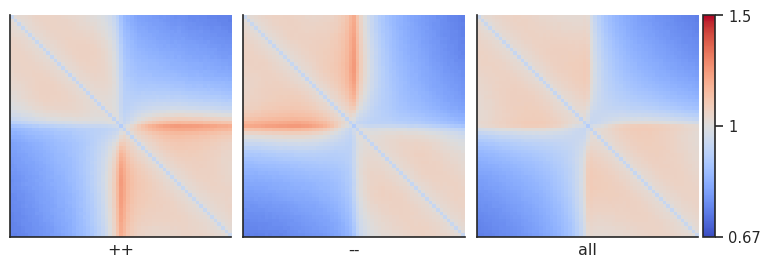

In [53]:
sites=peaks_motifs_bin_s.copy()
clr = bonev_cooler
pseudocount = 10./clr.info['sum']
pseudocount_a = 0
sites=peaks_motifs_bin_s.copy()
clr = bonev_cooler
pseudocount = 10./clr.info['sum']
pseudocount = 0
expected = expected_cis(
    clr,
    ignore_diags=0,
    view_df=view_df_bonev[:19],
    chunksize=1000000)

pup = coolpup.pileup(clr, sites, features_format='bed', expected_df=expected,view_df=view_df_bonev[:19], local=True,
                    by_strand=True,
                    flank=300_000, min_diag=0
                    )
#pup=pup[pup['orientation']=='all']
scr=[]
delta_val = 1
diag_offset_val = 5
max_distance_val = 30
for i in range(len(pup['data'])):
    print('i is %s'%i)
    #a,b,pile_c=get_isolated_regions(pup['data'][i],24,1,3,15)
    pile = pup['data'][i]
    score=chrscores.isolation_score(pile,delta=delta_val,diag_offset=diag_offset_val,max_dist=max_distance_val,
                                    snippet_shapes='triangle',
                                    pseudo_count=pseudocount)
    scr.append(score)
    print('score is %s'%score)
    

plotpup.plot(pup,
         cols='orientation', col_order=['++', '--','all'],
         score=False, cmap='coolwarm', scale='log', sym=True, vmax=1.5,
         height=3)


plt.savefig('output/figures/ondiagonal_for_bonev.pdf')
plt.show()

In [44]:
# Liu et al

INFO:coolpuppy:('chr1', 'chr1'): 743
INFO:coolpuppy:Total number of piled up windows: 743


i is 0
score is 1.3910294959591205
i is 1
score is 1.3934075777691806
i is 2
score is 1.3918267575768972


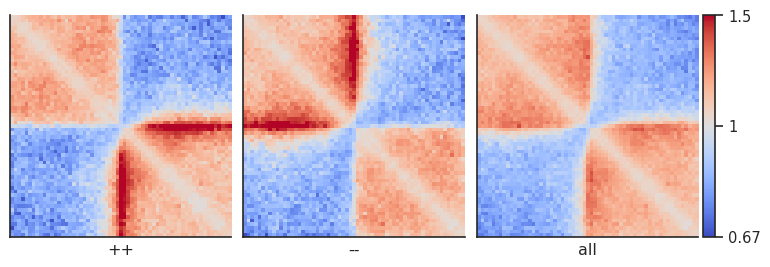

INFO:coolpuppy:('chr1', 'chr1'): 743
INFO:coolpuppy:Total number of piled up windows: 743


i is 0
score is 1.3092718883696988
i is 1
score is 1.3358746899823934
i is 2
score is 1.3220491175896159


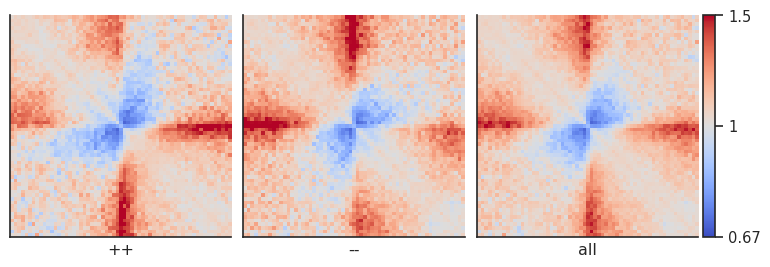

In [45]:
sites=peaks_motifs_quartile.copy()

for sample in sample_dict_liu:
    mcool_path_liu =  cooler_prefix_liu + sample_dict_liu[sample]
    liu_cooler = cooler.Cooler(mcool_path_liu+'::resolutions/'+str(res))
    view_df_liu = cooltools.lib.make_cooler_view(liu_cooler)[:19]
    
    clr = liu_cooler
    pseudocount = 10./clr.info['sum']
    
    expected = expected_cis(
        clr,
        ignore_diags=0,
        view_df=view_df_liu[:1],
        chunksize=1000000)
    
    pup = coolpup.pileup(clr, sites, features_format='bed', expected_df=expected,view_df=view_df_liu[:1], local=True,
                        by_strand=True,
                        flank=300_000, min_diag=0
                        )

    scr=[]
    delta_val = 1
    diag_offset_val = 10
    max_distance_val = 30
    for i in range(len(pup['data'])):
        print('i is %s'%i)
        pile = pup['data'][i]
        score=chrscores.isolation_score(pile,delta=delta_val,diag_offset=diag_offset_val,max_dist=max_distance_val,
                                        snippet_shapes='triangle',
                                        pseudo_count=pseudocount)
        scr.append(score)
        print('score is %s'%score)
        
    
    plotpup.plot(pup,
             cols='orientation', col_order=['++', '--','all'],
             score=False, cmap='coolwarm', scale='log', sym=True, vmax=1.5,
             height=3)
    
    
    plt.savefig('output/figures/ondiagonal_for_liu_%s_top_quart.pdf'%sample)
    plt.show()

In [51]:
sites5= sites[sites['chrom']=='chr5']
sites5

,chrom,start,end,name,score,mid,quartile_score,strand,cluster,cluster_start,cluster_end
14,chr5,3146622,3146995,SRR10099910.q30.mm10.sort_peak_33424,95,3146808.5,1,-,20753,3146622,3146995
31,chr5,3223894,3224134,SRR10099910.q30.mm10.sort_peak_33425,233,3224014.0,2,+,20754,3223894,3224134
44,chr5,3283172,3283384,SRR10099910.q30.mm10.sort_peak_33426,116,3283278.0,2,+,20755,3283172,3283384
60,chr5,3344404,3344651,SRR10099910.q30.mm10.sort_peak_33427,255,3344527.5,2,+,20756,3344404,3344651
110,chr5,3512711,3512976,SRR10099910.q30.mm10.sort_peak_33428,173,3512843.5,2,+,20757,3512711,3512976
...,...,...,...,...,...,...,...,...,...,...,...
28545,chr5,151368549,151368934,SRR10099910.q30.mm10.sort_peak_37088,859,151368741.5,4,-,22891,151368549,151368934
28552,chr5,151445763,151445998,SRR10099910.q30.mm10.sort_peak_37089,116,151445880.5,2,+,22892,151445763,151445998
28566,chr5,151644851,151645167,SRR10099910.q30.mm10.sort_peak_37090,638,151645009.0,4,-,22893,151644851,151645167
28571,chr5,151686663,151687221,SRR10099910.q30.mm10.sort_peak_37092,780,151686942.0,4,-,22894,151686663,151687221


INFO:coolpuppy:('chr1', 'chr1'): 2086
INFO:coolpuppy:('chr10', 'chr10'): 1550
INFO:coolpuppy:('chr11', 'chr11'): 2074
INFO:coolpuppy:('chr12', 'chr12'): 1280
INFO:coolpuppy:('chr13', 'chr13'): 1283
INFO:coolpuppy:('chr14', 'chr14'): 1271
INFO:coolpuppy:('chr15', 'chr15'): 1221
INFO:coolpuppy:('chr16', 'chr16'): 1059
INFO:coolpuppy:('chr17', 'chr17'): 1297
INFO:coolpuppy:('chr18', 'chr18'): 915
INFO:coolpuppy:('chr19', 'chr19'): 889
INFO:coolpuppy:('chr2', 'chr2'): 2320
INFO:coolpuppy:('chr3', 'chr3'): 1537
INFO:coolpuppy:('chr4', 'chr4'): 1949
INFO:coolpuppy:Total number of piled up windows: 20731


i is 0
score is 1.1466297692512741
i is 1
score is 1.137522705982011
i is 2
score is 1.1421568610261086


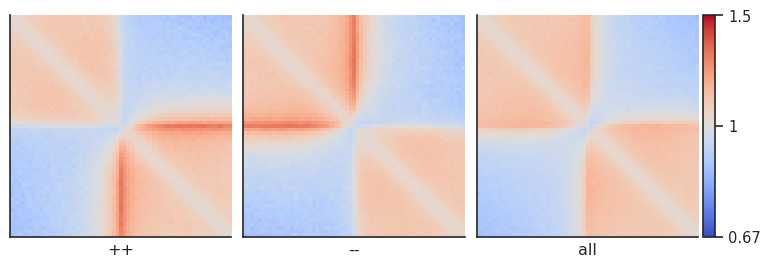

INFO:coolpuppy:('chr1', 'chr1'): 2086
INFO:coolpuppy:('chr10', 'chr10'): 1550
INFO:coolpuppy:('chr11', 'chr11'): 2074
INFO:coolpuppy:('chr12', 'chr12'): 1280
INFO:coolpuppy:('chr13', 'chr13'): 1283
INFO:coolpuppy:('chr14', 'chr14'): 1271
INFO:coolpuppy:('chr15', 'chr15'): 1221
INFO:coolpuppy:('chr16', 'chr16'): 1059
INFO:coolpuppy:('chr17', 'chr17'): 1297
INFO:coolpuppy:('chr18', 'chr18'): 915
INFO:coolpuppy:('chr19', 'chr19'): 889
INFO:coolpuppy:('chr2', 'chr2'): 2320
INFO:coolpuppy:('chr3', 'chr3'): 1537
INFO:coolpuppy:('chr4', 'chr4'): 1949
INFO:coolpuppy:Total number of piled up windows: 20731


i is 0
score is 1.1290634429947581
i is 1
score is 1.1105333821283245
i is 2
score is 1.1198968850017832


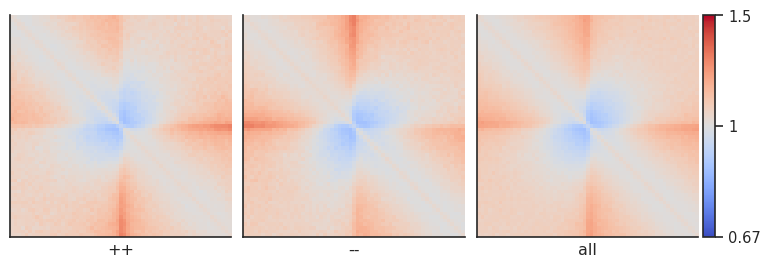

In [54]:
sites=peaks_motifs_bin_s.copy()

for sample in sample_dict_liu:
    mcool_path_liu =  cooler_prefix_liu + sample_dict_liu[sample]
    liu_cooler = cooler.Cooler(mcool_path_liu+'::resolutions/'+str(res))
    view_df_liu = cooltools.lib.make_cooler_view(liu_cooler)[:19]
    
    clr = liu_cooler
    pseudocount = 10./clr.info['sum']
    pseudocount =0
    expected = expected_cis(
        clr,
        ignore_diags=0,
        view_df=view_df_liu[:19],
        chunksize=1000000)
    
    pup = coolpup.pileup(clr, sites, features_format='bed', expected_df=expected,view_df=view_df_liu[:19], local=True,
                        by_strand=True,
                        flank=300_000, min_diag=0
                        )

    scr=[]
    delta_val = 1
    diag_offset_val = 5
    max_distance_val = 30
    for i in range(len(pup['data'])):
        print('i is %s'%i)
        pile = pup['data'][i]
        score=chrscores.isolation_score(pile,delta=delta_val,diag_offset=diag_offset_val,max_dist=max_distance_val,
                                        snippet_shapes='triangle',
                                        pseudo_count=pseudocount)
        scr.append(score)
        print('score is %s'%score)
        #print('average is %s'%(np.mean(a[a>0])/np.mean(b[b>0])))
        
    
    plotpup.plot(pup,
             cols='orientation', col_order=['++', '--','all'],
             score=False, cmap='coolwarm', scale='log', sym=True, vmax=1.5,
             height=3)
    
    
    plt.savefig('output/figures/ondiagonal_for_liu_%s.pdf'%sample)
    plt.show()

In [48]:
# Liu et al 2021

INFO:coolpuppy:('chr1', 'chr1'): 743
INFO:coolpuppy:Total number of piled up windows: 743


i is 0
score is 1.3703336068895093
i is 1
score is 1.4030747985182463
i is 2
score is 1.3864656558756105


FileNotFoundError: [Errno 2] No such file or directory: 'output/figs/ondiagonal_for_liu_new_Wapl-0h_new_topo_quart.pdf'

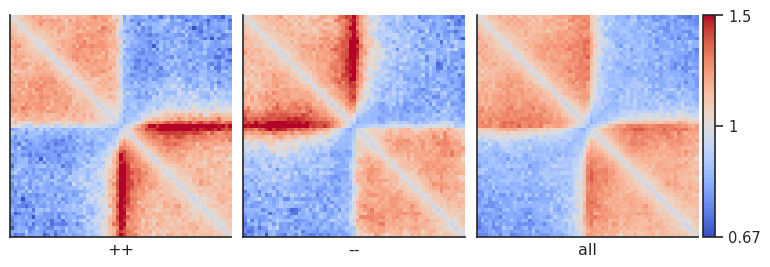

In [56]:
sites=peaks_motifs_quartile.copy()

for sample in sample_dict_liu_new:
    mcool_path_liu_new =  cooler_prefix_liu_new + sample_dict_liu_new[sample]
    liu_cooler_new = cooler.Cooler(mcool_path_liu_new+'::resolutions/'+str(res))
    view_df_liu_new = cooltools.lib.make_cooler_view(liu_cooler_new)[:19]
    
    clr = liu_cooler_new
    pseudocount = 10./clr.info['sum']
    
    expected = expected_cis(
        clr,
        ignore_diags=0,
        view_df=view_df_liu_new[:1],
        chunksize=1000000)
    
    pup = coolpup.pileup(clr, sites, features_format='bed', expected_df=expected,view_df=view_df_liu_new[:1], local=True,
                        by_strand=True,
                        flank=300_000, min_diag=0
                        )

    scr=[]
    delta_val = 1
    diag_offset_val = 5
    max_distance_val = 30
    for i in range(len(pup['data'])):
        print('i is %s'%i)
        pile = pup['data'][i]
        score=chrscores.isolation_score(pile,delta=delta_val,diag_offset=diag_offset_val,max_dist=max_distance_val,
                                        snippet_shapes='triangle',
                                        pseudo_count=pseudocount)
        scr.append(score)
        print('score is %s'%score)
        #print('average is %s'%(np.mean(a[a>0])/np.mean(b[b>0])))
        
    
    plotpup.plot(pup,
             cols='orientation', col_order=['++', '--','all'],
             score=False, cmap='coolwarm', scale='log', sym=True, vmax=1.5,
             height=3)
    
    
    plt.savefig('output/figs/ondiagonal_for_liu_new_%s_topo_quart.pdf'%sample)
    plt.show()

In [ ]:
sites=peaks_motifs_bin_s.copy()

for sample in sample_dict_liu_new:
    mcool_path_liu_new =  cooler_prefix_liu_new + sample_dict_liu_new[sample]
    liu_cooler_new = cooler.Cooler(mcool_path_liu_new+'::resolutions/'+str(res))
    view_df_liu_new = cooltools.lib.make_cooler_view(liu_cooler_new)[:19]
    
    clr = liu_cooler_new
    pseudocount = 10./clr.info['sum']
    pseudocount = 0
    expected = expected_cis(
        clr,
        ignore_diags=0,
        view_df=view_df_liu_new[:1],
        chunksize=1000000)
    
    pup = coolpup.pileup(clr, sites, features_format='bed', expected_df=expected,view_df=view_df_liu_new[:1], local=True,
                        by_strand=True,
                        flank=300_000, min_diag=0
                        )

    scr=[]
    delta_val = 1
    diag_offset_val = 5
    max_distance_val = 30
    for i in range(len(pup['data'])):
        print('i is %s'%i)
        pile = pup['data'][i]
        score=chrscores.isolation_score(pile,delta=delta_val,diag_offset=diag_offset_val,max_dist=max_distance_val,
                                        snippet_shapes='triangle',
                                        pseudo_count=pseudocount)
        scr.append(score)
        print('score is %s'%score)
        
    
    plotpup.plot(pup,
             cols='orientation', col_order=['++', '--','all'],
             score=False, cmap='coolwarm', scale='log', sym=True, vmax=1.5,
             height=3)
    
    plt.savefig('output/figs/ondiagonal_for_liu_new_%s.pdf'%sample)
    plt.show()

### isolation score, observed

In [ ]:
# bonev 2017

In [ ]:
sites=peaks_motifs_quartile.copy()
clr = bonev_cooler
pseudocount = 10./clr.info['sum']
pseudocount = 0
pup = coolpup.pileup(clr, sites, features_format='bed', view_df=view_df_bonev[:1], local=True,
                    by_strand=True,
                    flank=300_000, min_diag=0
                    )
scr=[]
delta_val = 1
diag_offset_val = 5
max_distance_val = 30
for i in range(len(pup['data'])):
    print('i is %s'%i)
    pile = pup['data'][i]
    score=chrscores.isolation_score(pile,delta=delta_val,diag_offset=diag_offset_val,max_dist=max_distance_val,
                                    snippet_shapes='triangle',
                                    pseudo_count=pseudocount)
    scr.append(score)
    print('score is %s'%score)
    #print('average is %s'%(np.mean(a[a>0])/np.mean(b[b>0])))
    

plotpup.plot(pup,
         cols='orientation', col_order=['++', '--','all'],
         score=False, cmap='fall', scale='log', sym=False, vmax=0.15,vmin=0.0008, 
         height=3)


plt.savefig('output/figs/ondiagonal_for_bonev_top_quart_observed.pdf')
plt.show()

In [ ]:
# Liu et al

In [ ]:
sites=peaks_motifs_quartile.copy()

for sample in sample_dict_liu:
    mcool_path_liu =  cooler_prefix_liu + sample_dict_liu[sample]
    liu_cooler = cooler.Cooler(mcool_path_liu+'::resolutions/'+str(res))
    view_df_liu = cooltools.lib.make_cooler_view(liu_cooler)[:19]
    
    clr = liu_cooler
    pseudocount = 10./clr.info['sum']
    pseudocout = 0
    pup = coolpup.pileup(clr, sites, features_format='bed', view_df=view_df_liu[:1], local=True,
                        by_strand=True,
                        flank=300_000, min_diag=0
                        )

    scr=[]
    delta_val = 1
    diag_offset_val = 5
    max_distance_val = 30
    for i in range(len(pup['data'])):
        print('i is %s'%i)
        pile = pup['data'][i]
        score=chrscores.isolation_score(pile,delta=delta_val,diag_offset=diag_offset_val,max_dist=max_distance_val,
                                        snippet_shapes='triangle',
                                        pseudo_count=pseudocount)
        scr.append(score)
        print('score is %s'%score)
        #print('average is %s'%(np.mean(a[a>0])/np.mean(b[b>0])))
        
    
    plotpup.plot(pup,
             cols='orientation', col_order=['++', '--','all'],
             score=False, cmap='fall', scale='log', sym=False, vmax=0.15,vmin=0.0008, 
             height=3)
    
    
    plt.savefig('output/figs/ondiagonal_for_liu_%s_top_quart_observed.pdf'%sample)
    plt.show()

In [ ]:
sites=peaks_motifs_quartile.copy()

for sample in sample_dict_liu_new:
    mcool_path_liu_new =  cooler_prefix_liu_new + sample_dict_liu_new[sample]
    liu_cooler_new = cooler.Cooler(mcool_path_liu_new+'::resolutions/'+str(res))
    view_df_liu_new = cooltools.lib.make_cooler_view(liu_cooler_new)[:19]
    
    clr = liu_cooler_new
    pseudocount = 10./clr.info['sum']
    pseudocount = 0
    pup = coolpup.pileup(clr, sites, features_format='bed',view_df=view_df_liu_new[:1], local=True,
                        by_strand=True,
                        flank=300_000, min_diag=0
                        )

    scr=[]
    delta_val = 1
    diag_offset_val = 5
    max_distance_val = 30
    for i in range(len(pup['data'])):
        print('i is %s'%i)
        pile = pup['data'][i]
        score=chrscores.isolation_score(pile,delta=delta_val,diag_offset=diag_offset_val,max_dist=max_distance_val,
                                        snippet_shapes='triangle',
                                        pseudo_count=pseudocount)
        scr.append(score)
        print('score is %s'%score)
        #print('average is %s'%(np.mean(a[a>0])/np.mean(b[b>0])))
        
    
    plotpup.plot(pup,
             cols='orientation', col_order=['++', '--','all'],
             score=False, cmap='fall', scale='log', sym=False, vmax=0.15,vmin=0.0008,
             height=3)
    
    plt.savefig('output/figs/ondiagonal_for_liu_new_%s_topo_quart_observed.pdf'%sample)
    plt.show()